# Task 1: Image Based Contour Following


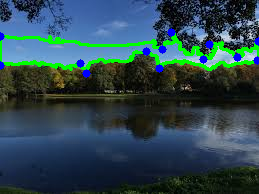

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread('path_to_image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and get the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
if contours:
    largest_contour = contours[0]

    # Draw the contour
    contour_img = image.copy()
    cv2.drawContours(contour_img, [largest_contour], -1, (0, 255, 0), 2)

    # Approximate the contour to reduce number of points (optional)
    epsilon = 0.01 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    # Draw approximated contour points
    for point in approx:
        cv2.circle(contour_img, tuple(point[0]), 4, (255, 0, 0), -1)

    # Show result
    cv2_imshow(contour_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No contours found.")

# Task 2: Contour Following with centroids

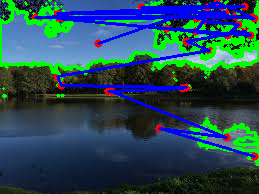

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('path_to_image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing
output = image.copy()

# List to store contour centroids
centroids = []

# Loop through each contour
for cnt in contours:
    # Draw the contour
    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)

    # Compute contour centroid
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        centroids.append((cx, cy))
        # Draw centroid
        cv2.circle(output, (cx, cy), 4, (0, 0, 255), -1)

# Draw lines connecting centroids to simulate "following" the contour path
for i in range(1, len(centroids)):
    cv2.line(output, centroids[i - 1], centroids[i], (255, 0, 0), 2)

# Show the result
cv2_imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Task 3: Reflection


1. How do you think contour detection techniques, like the ones you used in this lab, are applied
in real-world technologies such as facial recognition, medical imaging, or autonomous vehicles?


- In facial recognition, contours highlight key features such as the eyes, nose, and jawline which can aid in systems that need identification for security and authentication. In terms of medical imaging, contours are used to define areas of interest in diagnostic images, helping with accurate diagnosis, treatment planning, and monitoring. While in autonomous vehicles, contours are used to outline objects such as pedestrians, other vehicles, traffic signs, and road lanes to identify and differentiate between obstacles, road boundaries, and other objects for safe and legal navigation.


2. What challenges did you face while interpreting image data using code, and how might this
relate to the complexity of processing visual information in real-time systems (e.g.,
surveillance cameras or robots)?

- One challenge is dealing with varying lighting conditions, which can make it difficult to extract consistent features for interpretation. In bright light, surveillance cameras and systems can easily detect people or vehicles. However, in low-light conditions or when there are harsh shadows, it can reduce the system's ability to accurately identify and track intruders, leading to potential security vulnerabilities. Another is that it is computationally intensive, especially when working with high-quality images. Processing delays from large files or complex models can slow response times or cause system failures in critical applications.




3. In what ways could the ability to trace and analyze shapes in images help improve everyday
tools or processes, like mobile apps or industrial automation?
- Tracing and analyzing shapes can enhance mobile apps by improving AR object detection and enabling features like automatic background removal in image editing. In industrial automation, it helps inspect parts for defects, ensures consistency in shape and size, and supports automated sorting and packaging based on object geometry.